Big Data Mart Sales Problem
Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

importing data;

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv") 
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


after observing data set i have observed that item_outlet_sales is my target column
after checking the target column the data are in continious data so i have to use regression model. 

#EDA

In [3]:
df.shape

(8523, 12)

in my dataset i have 8523 rows and 12 columns

In [4]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

these are the columns of my dataset

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Here i can see that in my dataset there are null values present in item_weight and outleet_size columns

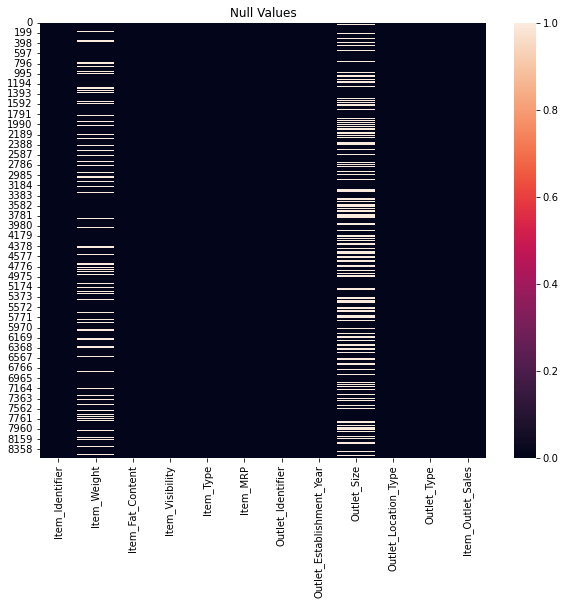

In [9]:
plt.figure(figsize=[10,8])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()


Here i am visualizing the null values

In [10]:
#checking unique values present in targeted columns
df['Item_Outlet_Sales'].unique()

array([3735.138 ,  443.4228, 2097.27  , ..., 7182.6504, 3608.636 ,
       2778.3834])

In [11]:
#Checking for any blank spaces in target column
df.loc[df['Item_Outlet_Sales'] == " "]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


There is no blank space present in targeted columns

In [12]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Here i can observe that
1)Mean of Item_MRP is more than any other column which means sales is very much correlated with item mrp.
2)By observing count we can notice whather there are null values or not.
3)The Item_MRP starts from 31.29 and it goes uptp 266.88.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

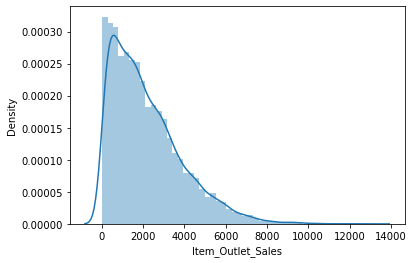

In [13]:
sns.distplot(df['Item_Outlet_Sales'])

My target variable is not normally distributed, which mean the distribution of sales in all the oultets is not normal.I have to check further to get more insight about the data.

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

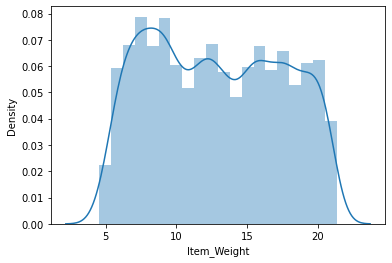

In [14]:
sns.distplot(df['Item_Weight'])

Item_Weight looks almost normally distributed.But i already know there is null values in Item_weight column.So i have to remove them.

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

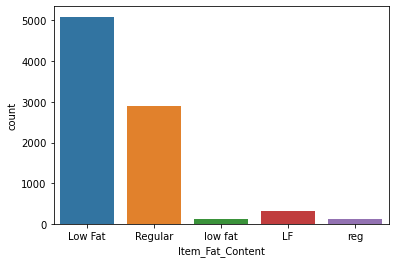

In [18]:
sns.countplot(df['Item_Fat_Content'])

1)I can observe that Low Fat has multiple countings like LF and low fat and also Regular has multiple countings.
2)I have to merge all LF, low fat with Low Fat.And reg with Regular.

In [19]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

LF, low fat belong to same category that is Low Fat and reg belong to Regular category so replacing LF, low fat and reg to thier category.

In [20]:
df.Item_Fat_Content=df.Item_Fat_Content.replace('LF','Low Fat')
df.Item_Fat_Content=df.Item_Fat_Content.replace('low fat','Low Fat')
df.Item_Fat_Content=df.Item_Fat_Content.replace('reg','Regular')

In [19]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

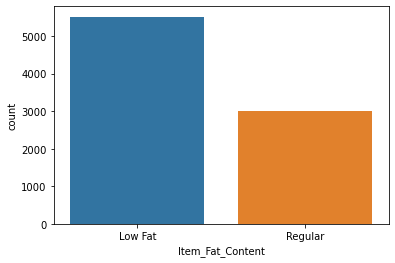

In [20]:
sns.countplot(df['Item_Fat_Content'])

Maximum items sold are of Low Fat almost 6000 products are Low Fat.
1)It means that producing low fat items will increase the sales rate.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

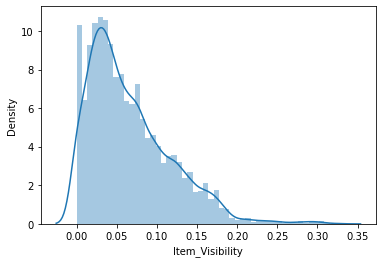

In [21]:
sns.distplot(df['Item_Visibility'])

The distribution of Item Visibility is skewed which means if the visibility is more then density is going less.

In [22]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

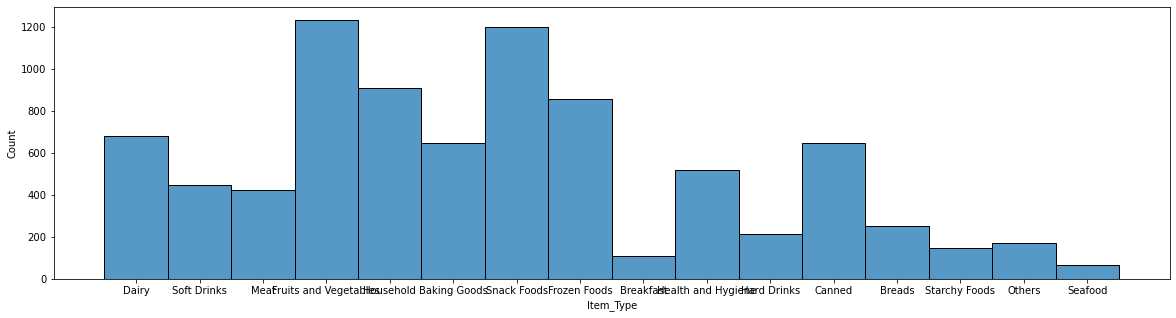

In [23]:
plt.figure(figsize=(20,5))
sns.histplot(df['Item_Type'])
plt.show()

I can observe that Fruits and vegetables,snack food is having maximum count which mean producing these two types of products will increase the sales.

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

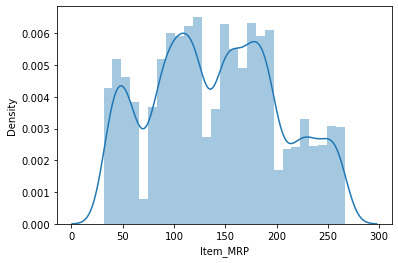

In [24]:
sns.distplot(df['Item_MRP'])

It looks not normal and the distribution is multi modal in nature with mulitple peaks., but still MRP in the range of 100-200 will have max sales,if we increase or decrease the rates above the range then sales will reduced, this is what i have observed from the plot.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

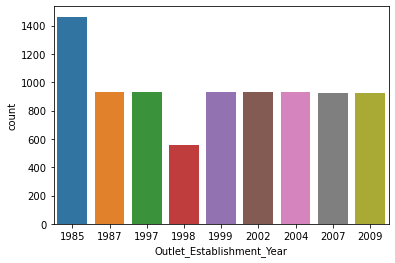

In [25]:
sns.countplot(df['Outlet_Establishment_Year'])

In [27]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

There are 3 unique values in Outlet_size.And Medium is the mode for Outlet_size column.Which i can use to treat null value.

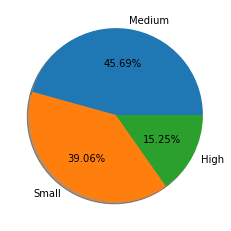

In [28]:
labels='Medium','Small','High'
fig, ax = plt.subplots()
ax.pie(df['Outlet_Size'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

By observing the pie chart i can say that outlets with size Medium are more in number and also outlets with size high are less in number.

In [29]:
df.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

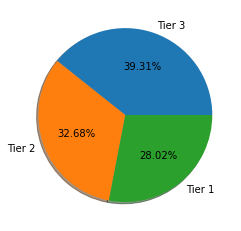

In [30]:
labels='Tier 3','Tier 2','Tier 1'
fig, ax = plt.subplots()
ax.pie(df['Outlet_Location_Type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Tier 3 location has maximum count compared to Tier 2 and Tier 1.

In [31]:
df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

There are 4 uniques of Outlet_Type.So i can plot pie chart for this.

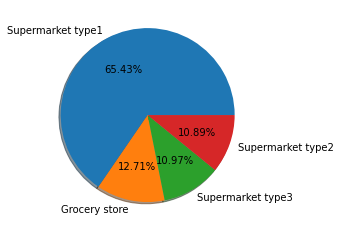

In [32]:
labels='Supermarket type1','Grocery store','Supermarket type3','Supermarket type2'
fig, ax = plt.subplots()
ax.pie(df['Outlet_Type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

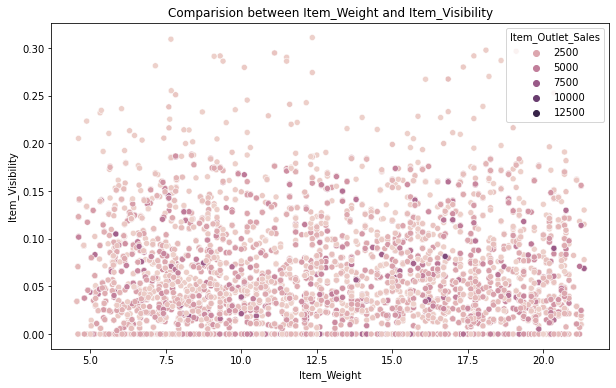

In [26]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Item_Weight and Item_Visibility')
sns.scatterplot(df['Item_Weight'],df['Item_Visibility'],hue=df["Item_Outlet_Sales"]);

I can see that Item_Weight has nothing to do with sales, and as Item_Visibility increases then the sales is going to be reduced.

<AxesSubplot:title={'center':'Comparision between Item_MRP and Item_Visibility'}, xlabel='Item_MRP', ylabel='Item_Visibility'>

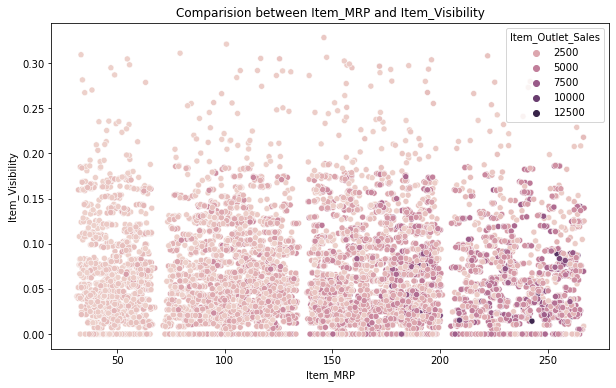

In [27]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Item_MRP and Item_Visibility')
sns.scatterplot(df['Item_MRP'],df['Item_Visibility'],hue=df["Item_Outlet_Sales"])

<AxesSubplot:title={'center':'Comparision between Item_Type and Item_Outlet_Sales'}, xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

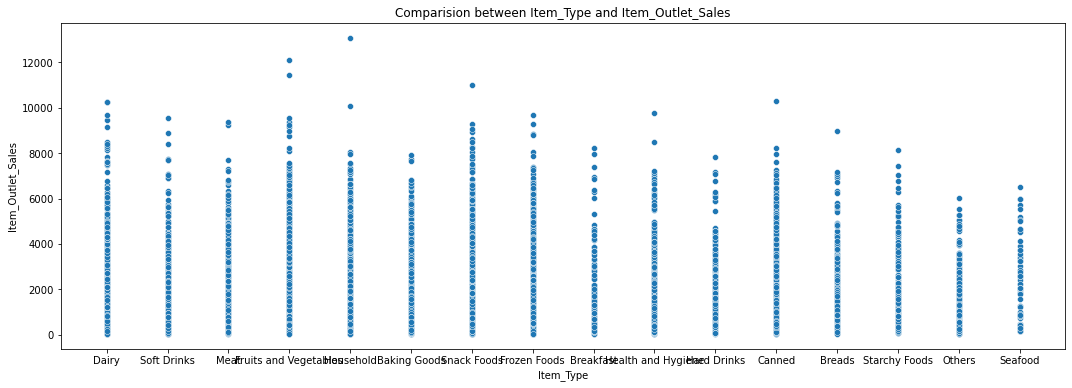

In [28]:
plt.figure(figsize=[18,6])
plt.title('Comparision between Item_Type and Item_Outlet_Sales')
sns.scatterplot(df['Item_Type'],df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

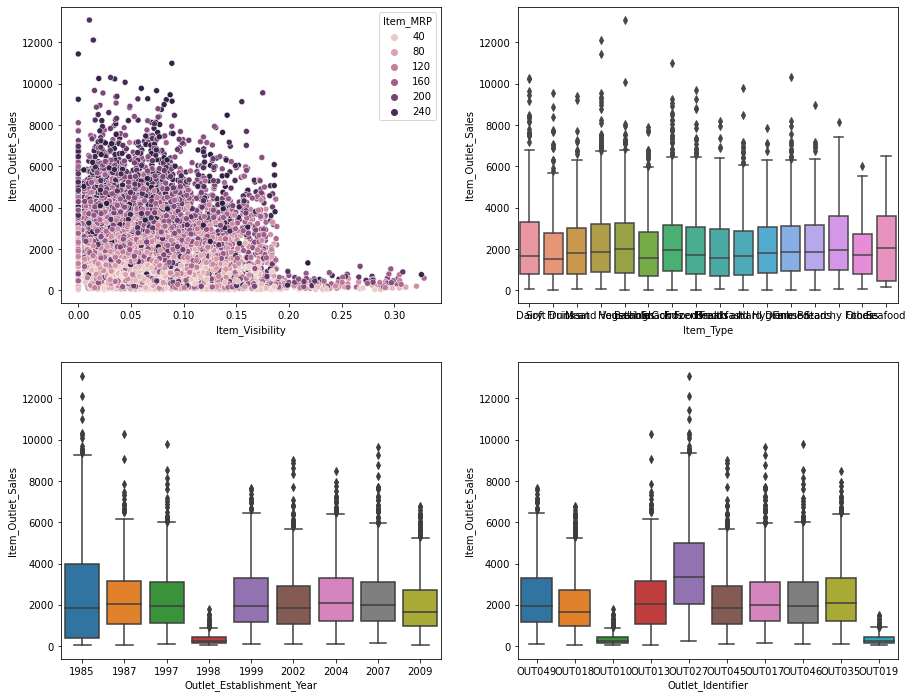

In [29]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_MRP',ax=axes[0,0],data=df)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[0,1],data=df)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[1,1],data=df)
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[1,0],data=df)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

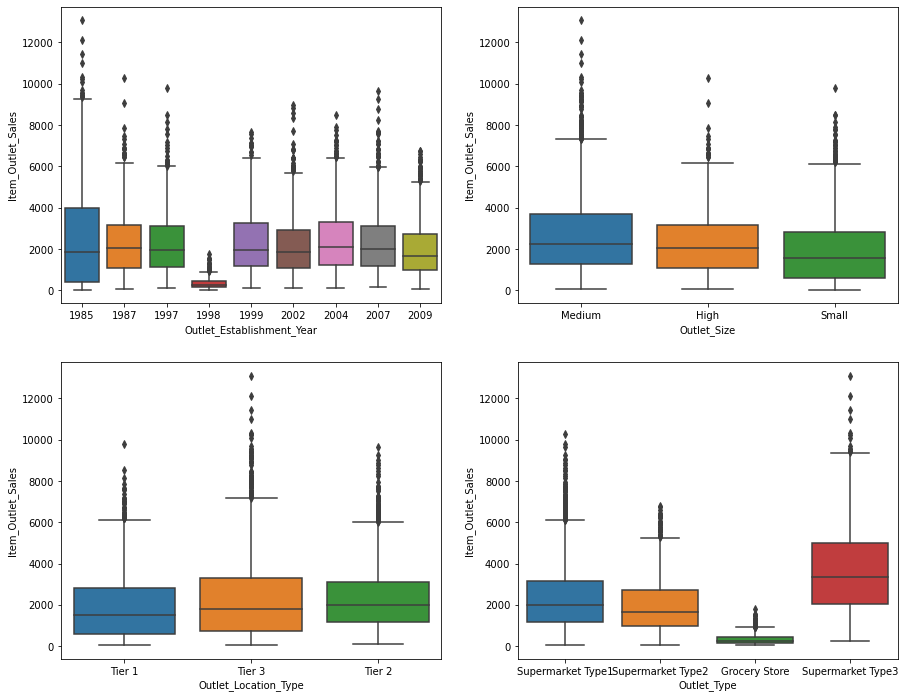

In [31]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=df)

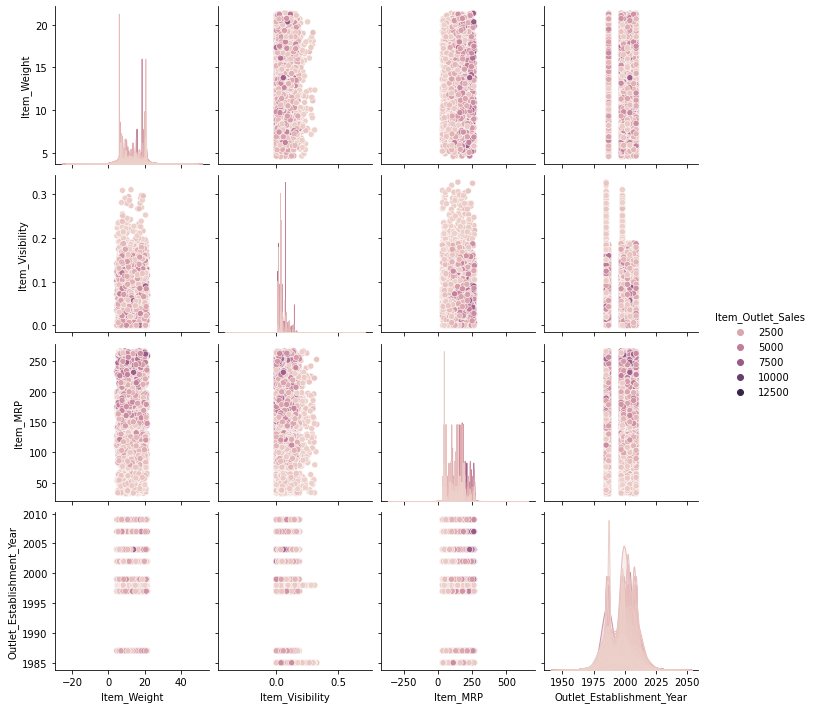

In [32]:
sns.pairplot(df,hue="Item_Outlet_Sales")

Treating the null values

In [33]:
df["Item_Weight"]=df["Item_Weight"].fillna(df["Item_Weight"].mean())

df["Outlet_Size"]=df["Outlet_Size"].fillna(value='Medium')

In [35]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

here i can see that there is no null values

In [36]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Checking outliers

<AxesSubplot:>

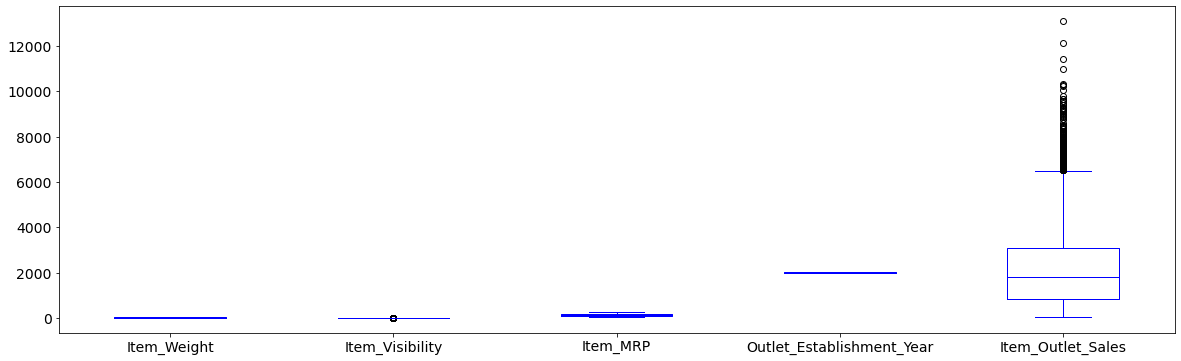

In [39]:
df.plot(kind='box',fontsize=14,figsize=(20,6),color='b')

here i can see item visibility has outliers present

#Removing Outliers

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(df[["Item_Visibility"]]))
df_new=df[(z<3).all(axis=1)]
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [41]:
df_new.shape

(8428, 12)

In [42]:
df.shape

(8523, 12)

In [43]:
Dataloss=(((8523-8428)/8523)*100)
Dataloss

1.1146309984747156

#Checking skewenss

In [44]:
df.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

i can see there in little skewness present in item visibility.

#removing skewness

In [45]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [46]:
df_new[['Item_Visibility']] = scaler.fit_transform(df_new[['Item_Visibility']].values)

In [47]:
df_new.skew()

Item_Weight                  0.089907
Item_Visibility              0.115444
Item_MRP                     0.128945
Outlet_Establishment_Year   -0.409186
Item_Outlet_Sales            1.173070
dtype: float64

i have removed the skewness from the item visibility column

#Checking correlation.

In [49]:
df_new.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.009687,0.024435,-0.008377,0.010575
Item_Visibility,-0.009687,1.000000,0.004299,-0.034066,-0.076931
Item_MRP,0.024435,0.004299,1.000000,0.006989,0.573491
Outlet_Establishment_Year,-0.008377,-0.034066,0.006989,1.000000,-0.060149
Item_Outlet_Sales,0.010575,-0.076931,0.573491,-0.060149,1.000000


<AxesSubplot:>

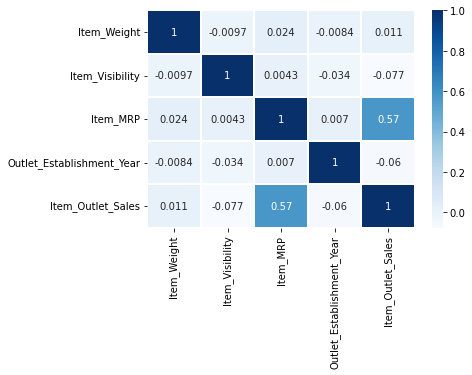

In [54]:
sns.heatmap(df_new.corr(),linewidths=.1,cmap="Blues",annot=True)



here i can see that item weight is very less correlated with target column.so i am going to drp this column

In [55]:
df_new = df_new.drop(["Item_Weight"],axis=1)

In [67]:
df_new.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,623,0,-1.142270,10,249.8092,9,1999,1,0,1,3735.1380
1,1337,1,-1.032913,6,48.2692,3,2009,1,2,2,443.4228
2,1185,0,-1.117874,2,141.6180,9,1999,1,0,1,2097.2700
3,138,1,-1.734798,12,182.0950,0,1998,1,2,0,732.3800
4,332,0,-1.734798,15,53.8614,1,1987,0,2,1,994.7052


#label encoding

In [57]:
from sklearn.preprocessing import LabelEncoder

In [68]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_columns = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Establishment_Year']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df_new[column] = label_encoders[column].fit_transform(df_new[column])

In [70]:
df_new

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,623,0,-1.142270,10,249.8092,9,4,1,0,1,3735.1380
1,1337,1,-1.032913,6,48.2692,3,8,1,2,2,443.4228
2,1185,0,-1.117874,2,141.6180,9,4,1,0,1,2097.2700
3,138,1,-1.734798,12,182.0950,0,3,1,2,0,732.3800
4,332,0,-1.734798,15,53.8614,1,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,861,0,0.033409,5,214.5218,1,1,0,2,1,2778.3834
8519,1445,1,-0.212619,0,108.1570,7,5,1,1,1,549.2850
8520,399,0,-0.537754,14,85.1224,6,6,2,1,1,1193.1136
8521,1206,1,1.538309,5,103.1332,3,8,1,2,2,1845.5976


In [71]:
x = df_new.drop("Item_Outlet_Sales",axis=1)
y = df_new["Item_Outlet_Sales"]

#Scaling data using MinMaxScaler

In [72]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [73]:
mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

In [74]:
x

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.399872,0.0,0.150584,0.666667,0.927507,1.000000,0.500,0.5,0.0,0.333333
1,0.858151,1.0,0.178376,0.400000,0.072068,0.333333,1.000,0.5,1.0,0.666667
2,0.760591,0.0,0.156784,0.133333,0.468288,1.000000,0.500,0.5,0.0,0.333333
3,0.088575,1.0,0.000000,0.800000,0.640093,0.000000,0.375,0.5,1.0,0.000000
4,0.213094,0.0,0.000000,1.000000,0.095805,0.111111,0.125,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...
8423,0.552632,0.0,0.449370,0.333333,0.777729,0.111111,0.125,0.0,1.0,0.333333
8424,0.927471,1.0,0.386845,0.000000,0.326263,0.777778,0.625,0.5,0.5,0.333333
8425,0.256098,0.0,0.304215,0.933333,0.228492,0.666667,0.750,1.0,0.5,0.333333
8426,0.774069,1.0,0.831823,0.333333,0.304939,0.333333,1.000,0.5,1.0,0.666667


In [75]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.5384358024071076  on Random_state  115


In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [ ]:
#Regression models

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [78]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.5384358024071076


In [79]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))


R2_score: 0.5835616072332009


In [80]:
knnr=KNN()
knnr.fit(x_train,y_train)
pred=knnr.predict(x_test)
print('R2_score:',r2_score(y_test,pred))


R2_score: 0.5287617172549918


In [81]:
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
pred=SGD.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.5364698480747798


#Crossvalidation score

In [82]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.5047868493575617


In [83]:
print(cross_val_score(RFR,x,y,cv=5).mean())

0.5508593332219206


In [84]:
print(cross_val_score(knnr,x,y,cv=5).mean())

0.5016243047815753


In [85]:
print(cross_val_score(SGD,x,y,cv=5).mean())

0.5041541767465864


And observing the difference of r2_scores of the model and the cross validation score i want go with that KNN as the best model.

#Hyper Parameter tuning

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
parameter = {'n_neighbors':[1,2,3,4,5,6],
             'weights':['uniform','distance'],
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
             'n_jobs':[1,2,3,4,5]}

In [88]:
GCV=GridSearchCV(KNN(),parameter,cv=5)

In [89]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [1, 2, 3, 4, 5],
                         'n_neighbors': [1, 2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [90]:
GCV.best_params_

{'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 6, 'weights': 'distance'}

In [91]:
Final_mod=KNN(algorithm='auto',n_jobs=1,n_neighbors=6,weights='uniform')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=r2_score(y_test, pred)

print(acc*100)

54.56187119196354


In [92]:
import joblib
joblib.dump(Final_mod,"Bigdatamartsales.pkl")

['Bigdatamartsales.pkl']

In [93]:
df2=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
df2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [95]:
df2.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [97]:
type(df2)

pandas.core.frame.DataFrame

In [98]:
df2.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object